# Bianconi-Barabasi Model

### This model is adapted from the Barabasi-Albert Model, and the underlying difference lies in the additional fitness parameter $\eta\$, which represents an inherent attractiveness to new nodes independent of the degree.

In [134]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
import math

# Function for drawing the bianconi-barabasi model

def bianconi_barabasi(n, m):
    g = nx.empty_graph(m)
    g.add_edges_from([(i, m) for i in range(m)])
    etas = np.array([-1])
    while any(etas<0) or any(etas>1):
        etas = np.random.normal(0.5, 0.2, n)
    
    def p_factored(node):
        return etas[node]*g.degree(node)
    p_factored = np.vectorize(p_factored)
    
    for i in range(m+1, n):
        g.add_node(i)
        targets = []
        p_total = sum(p_factored(np.array(range(i))))
        
        def p_dist(node):
            return p_factored(node) / p_total
        p_dist = np.vectorize(p_dist)
        
        p = p_dist(np.array(range(i)))
        while len(set(targets)) < m:
            targets = np.random.choice(list(range(i)), size = m, p = p)
        g.add_edges_from(zip(np.full(m, i), targets))
        
    return g



Name: 
Type: Graph
Number of nodes: 50
Number of edges: 184
Average degree:   7.3600
Clustering Coefficient: 0.2778551540994265
Transitivity: 0.22375215146299485


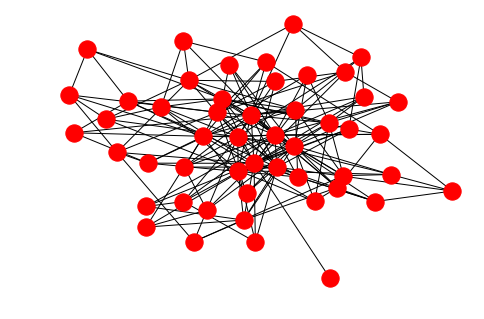

0.033524513244628906


<Figure size 432x288 with 0 Axes>

In [135]:
toc = time.time()
g = bianconi_barabasi(50, 4)
tic = time.time()
print(nx.info(g))
print(f"Clustering Coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
plots = zip()
plt.show()
plt.clf()
print(tic-toc)

In [ ]:
toc = time.time()
g = nx.barabasi_albert_graph(50, 4)
tic = time.time()
print(nx.info(g))
print(f"Clustering Coefficient: {nx.average_clustering(g)}")
print(f"Transitivity: {nx.transitivity(g)}")
nx.draw(g)
plt.show()
plt.clf()
print(tic-toc)

In [138]:
def mass_trial(num):
    g = bianconi_barabasi(50, 4)
    return nx.average_clustering(g)

mass_trial = np.vectorize(mass_trial)

res = sum(mass_trial(np.random.ranf(1000))/1000)
print(res)

0.2837004824851802


In [139]:
def mass_test(num):
    g = nx.barabasi_albert_graph(50, 4)
    return nx.average_clustering(g)

mass_test = np.vectorize(mass_test)

res = sum(mass_test(np.random.ranf(1000))/1000)
print(res)

0.2625650086100971
